In [9]:
!pip install pystan
# Install the latest Prophet
!pip install prophet


In [10]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)

In [12]:
print(df.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [13]:
df.rename(columns={'Month':'ds', 'Passengers':'y'}, inplace=True)

In [14]:
df['ds'] = pd.to_datetime(df['ds'])

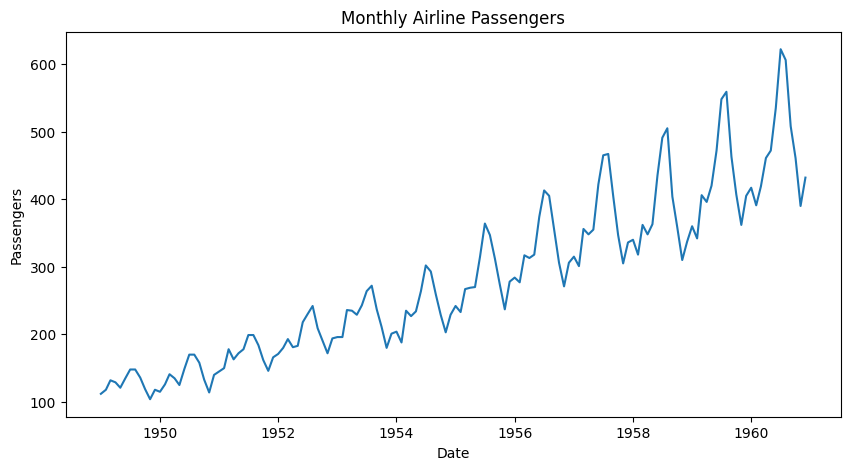

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df['ds'], df['y'])
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

In [16]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx49xjd57/h7565sfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx49xjd57/uv8ekurs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48426', 'data', 'file=/tmp/tmpx49xjd57/h7565sfv.json', 'init=/tmp/tmpx49xjd57/uv8ekurs.json', 'output', 'file=/tmp/tmpx49xjd57/prophet_model9gafwlqv/prophet_model-20251025041628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:16:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:16:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
future = model.make_future_dataframe(periods=12, freq='M')  # Forecast 1 year ahead
forecast = model.predict(future)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


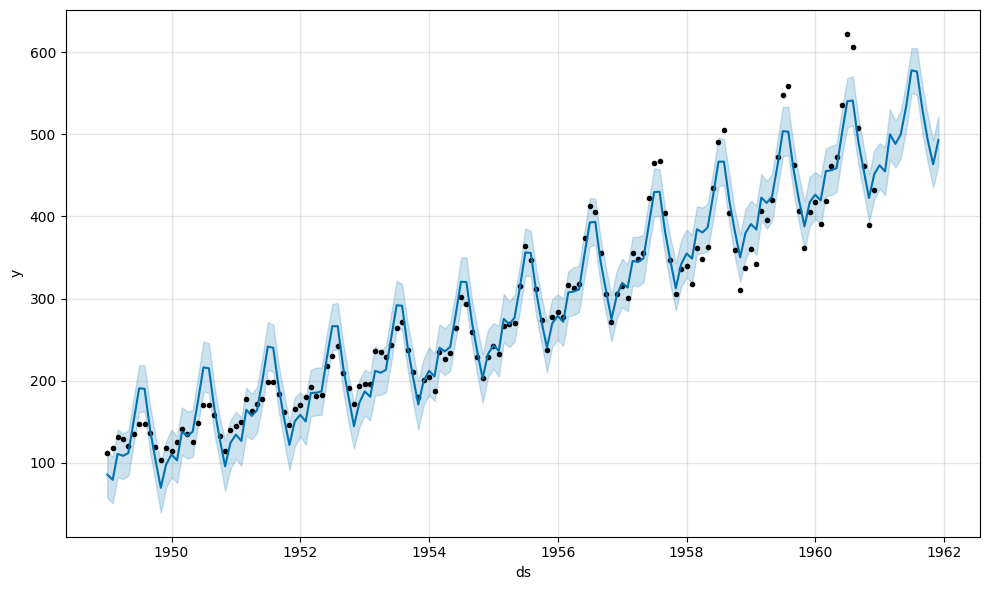

In [18]:
fig = model.plot(forecast)
plt.show()

In [20]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [22]:
df_cv = cross_validation(model,
                         initial='2160D',
                         period='360D',
                         horizon='360D',
                         parallel="processes")

print(df_cv.head())

INFO:prophet:Making 6 forecasts with cutoffs between 1955-01-02 00:00:00 and 1959-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2f9633ab70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx49xjd57/dxvm9d2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx49xjd57/4tzfb1ju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx49xjd57/15a2_c_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx49xjd57/5krv9a0p.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60968', 'data', 'file=/tmp/tmpx49xjd57/4tzfb1ju.json', 'init=/tmp/tmpx49xjd57/15a2_c_4.json', 'output', 'file=/tmp/tmpx49xjd57/prophet_modelpb2lel_g/prophet_model-20251025044319.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
DEBUG:cmdstanpy:idx 0
04:43:19 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:runnin

          ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 1955-02-01  242.183868  230.548641  253.851480  233 1955-01-02
1 1955-03-01  267.433578  256.450423  279.298546  267 1955-01-02
2 1955-04-01  258.111949  246.711317  270.115281  269 1955-01-02
3 1955-05-01  262.389970  251.046746  273.460742  270 1955-01-02
4 1955-06-01  275.391829  263.871827  286.871932  315 1955-01-02


    horizon          mse       rmse        mae      mape     mdape     smape  \
0   35 days   366.549092  19.145472  15.629777  0.048081  0.039416  0.046499   
1   41 days   540.837864  23.255921  20.565102  0.064466  0.063643  0.061975   
2   46 days   876.863538  29.611882  25.198208  0.078950  0.084020  0.074943   
3   51 days  1032.445946  32.131697  27.208528  0.084750  0.084020  0.080137   
4   56 days  1034.551142  32.164439  27.243189  0.083887  0.077979  0.079340   
..      ...          ...        ...        ...       ...       ...       ...   
60 339 days  1078.778489  32.844763  27.559286  0.086829  0.080373  0.082743   
61 344 days  1128.643017  33.595283  28.705277  0.088430  0.080373  0.084236   
62 349 days  1585.845689  39.822678  33.502658  0.101293  0.080373  0.095412   
63 354 days  1003.491940  31.677941  25.474670  0.074513  0.076688  0.071393   
64 360 days   956.356979  30.925022  24.295614  0.070241  0.076688  0.067333   

    coverage  
0   0.571429  
1   0.428

/usr/local/lib/python3.12/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.12/dist-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


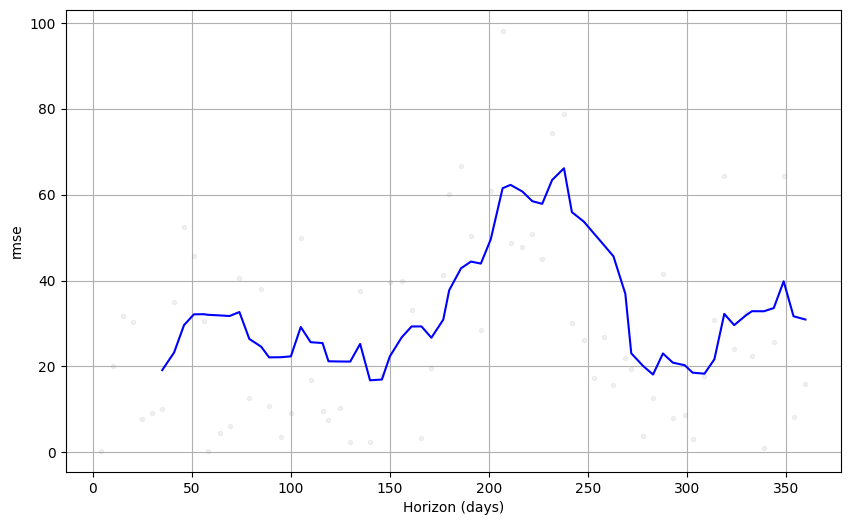

In [23]:
df_p = performance_metrics(df_cv)
print(df_p)
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()